In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log10, floor, ceil

In [2]:
def mnk(x, y):
    b = (np.mean(x*y) - np.mean(x)*np.mean(y))/(np.mean(x**2) - np.mean(x)**2)
    a = np.mean(y) - b*np.mean(x)
    sb = 1/np.sqrt(len(x)) * np.sqrt((np.mean(y**2) - np.mean(y)**2)/(np.mean(x**2) - np.mean(x)**2) - b**2)
    sa = sb*np.sqrt(np.mean(x**2) - np.mean(x)**2)
    
    return a, b, sa, sb

def mnk_a0(x, y):
    b = np.mean(x*y)/np.mean(x**2)
    sb = 1/np.sqrt(len(x)) * np.sqrt((np.mean(y**2)/np.mean(x**2)) - b**2)
    
    return b, sb

def round_to_1(x):
    return round(x*10**-int(floor(log10(abs(x)))))/10**-int(floor(log10(abs(x))))

def science_notation(x, err):
    err = round_to_1(err)
    x = round(x, len(str(err))-2)
    return f'{str(x) + "0"*(len(str(err)) - len(str(x)))}±{err}', (str(x) + "0"*(len(str(err)) - len(str(x))), str(err))

In [3]:
science_notation(0.012, 0.0001)

('0.0120±0.0001', ('0.0120', '0.0001'))

## Таблица с харастеристиками приборов

In [4]:
spec_df = pd.read_csv('data/specifications.csv', encoding='ansi', index_col=0)
print(spec_df.style.to_latex())
spec_df

\begin{tabular}{lll}
 & Вольтметр & Миллиамперметр \\
Система & Магнитоэлектрическая & Цифровая \\
Класс точности & 0.2 & - \\
Предел измерений $x_п$ & 0.6 В & 2 А - 0.5 А \\
Число делений $x_п/n$ & 150 & - \\
Чувствительность $n/x_п$ & 4 мВ/дел & - \\
Абсолютная погрешность $\Delta x_M$ & 2 мВ & 0.006 мА - 0.6 мА \\
Внутреннее сопротивление прибора & 4000 Ом & 1.2 Ом \\
\end{tabular}



,Вольтметр,Миллиамперметр
Система,Магнитоэлектрическая,Цифровая
Класс точности,0.2,-
Предел измерений $x_п$,0.6 В,2 А - 0.5 А
Число делений $x_п/n$,150,-
Чувствительность $n/x_п$,4 мВ/дел,-
Абсолютная погрешность $\Delta x_M$,2 мВ,0.006 мА - 0.6 мА
Внутреннее сопротивление прибора,4000 Ом,1.2 Ом


## Таблица с диаметром проволоки

In [5]:
wire_df = pd.read_csv('data/wire_diameter.csv', encoding='ansi', sep=';', index_col=0)

In [6]:
d1_mean = np.mean(wire_df.iloc[0])
d2_mean = np.mean(wire_df.iloc[1])

d1_std = 1/len(wire_df.iloc[0]) * (sum([(d1_mean - _)**2 for _ in wire_df.iloc[0]]))**0.5
d2_std = 1/len(wire_df.iloc[1]) * (sum([(d2_mean - _)**2 for _ in wire_df.iloc[1]]))**0.5

In [9]:
np.std(wire_df.iloc[0]), d1_std

(5.551115123125783e-17, 1.755416734288351e-17)

In [7]:
errord1 = np.sqrt(d1_std**2 + 0.1**2)
errord2 = np.sqrt(d2_std**2 + 0.01**2)

In [8]:
d2_mean

0.35899999999999993

In [9]:
(d2_std**2 + 0.01**2)**0.5

0.010143963722332608

In [10]:
print(f'Штангенциркуль: ({science_notation(d1_mean, errord1)[0]})мм, микрометр: ({science_notation(d2_mean, errord2)[0]})мм')

Штангенциркуль: (0.4±0.1)мм, микрометр: (0.36±0.01)мм


Площадь сечения и погрешности

In [11]:
S = np.pi*d2_mean**2/4
errorS = 2*S*errord2/d2_mean
print(f'Площадь сечения = ({science_notation(S, errorS)[0]})мм^2')

Площадь сечения = (0.101±0.006)мм^2


In [12]:
wire_df.iloc[0] = [str(_) for _ in wire_df.iloc[0]]
wire_df.iloc[1] = [str(_) for _ in wire_df.iloc[1]]
print(wire_df.style.to_latex())
wire_df

\begin{tabular}{lllllllllll}
 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\
$d_1$, мм & 0.4 & 0.4 & 0.4 & 0.4 & 0.4 & 0.4 & 0.4 & 0.4 & 0.4 & 0.4 \\
$d_2$, мм & 0.36 & 0.35 & 0.36 & 0.35 & 0.36 & 0.36 & 0.36 & 0.36 & 0.36 & 0.37 \\
\end{tabular}



,1,2,3,4,5,6,7,8,9,10
"$d_1$, мм",0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
"$d_2$, мм",0.36,0.35,0.36,0.35,0.36,0.36,0.36,0.36,0.36,0.37


## Показания вольтметра и амперметра

In [13]:
t3 = []
wlens = [20, 30, 50]
for i in wlens:
    t3.append([pd.read_csv(f'data/t3_{i}_up.csv', encoding='ansi', sep=';'), pd.read_csv(f'data/t3_{i}_down.csv', encoding='ansi', sep=';')])

In [14]:
np.array([0.5, 0.5, 0.5])/np.array(wlens) * 100

array([2.5       , 1.66666667, 1.        ])

In [15]:
# for i in range(3):
#     for j in range(2):
#         t3[i][j]['I, мА'] = [str(q) for q in t3[i][j]['I, мА']]

# g = pd.concat([t3[0][0], t3[0][1]])
# for i in range(1, 3):
#     g = pd.concat([g, pd.concat([t3[i][0], t3[i][1]])], axis=1)
# print(g.style.to_latex())

r(l=20)=(2.13±0.03) Ом
r(l=30)=(3.22±0.03) Ом
r(l=50)=(5.32±0.04) Ом


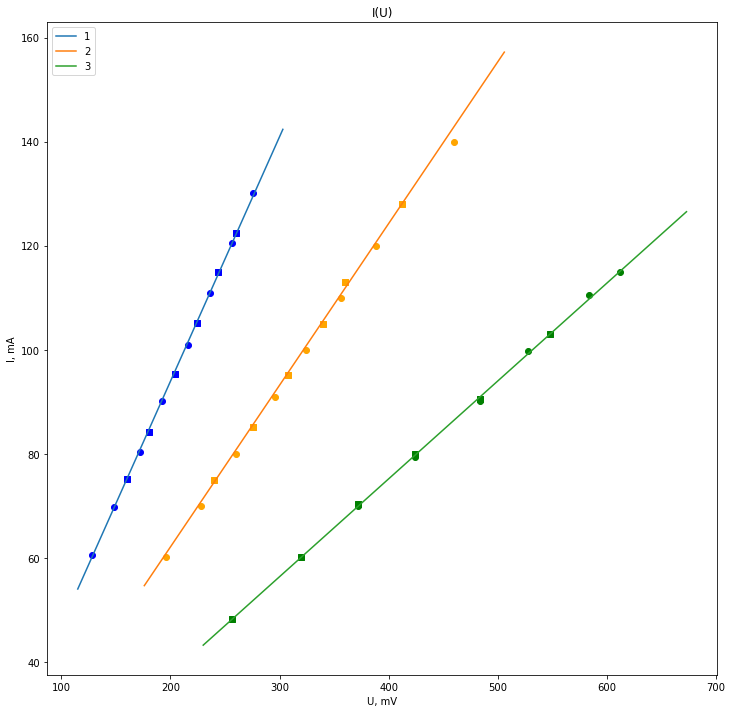

In [19]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_ylabel('I, mA')
ax.set_xlabel('U, mV')
ax.set_title(f'I(U)')

rs = []
errRs = []
colors = ['blue', 'orange', 'green']
for i, wlen in enumerate(wlens):
    X = np.concatenate((t3[i][0]['I, мА'].values, t3[i][1]['I, мА'].values), axis=0)
    Y = np.concatenate((t3[i][0]['V, мВ'].values, t3[i][1]['V, мВ'].values), axis=0)
    
    maxI = min(X)
    maxU = min(Y)
    epsR = np.sqrt((0.01/maxI)**2 + (2/maxU)**2)
    
    ax.scatter(t3[i][0]['V, мВ'].values, t3[i][0]['I, мА'].values, marker='o', c=colors[i])
    ax.scatter(t3[i][1]['V, мВ'].values, t3[i][1]['I, мА'].values, marker='s', c=colors[i])
    b, sb = mnk_a0(t3[i][j]['I, мА'].values, t3[i][j]['V, мВ'].values)

    x = np.array([int(min(Y)*0.9), int(max(Y)*1.1)])
    y = x/b
    errRs.append([epsR * b, sb])
    sb = np.sqrt(sb**2 + (b*epsR)**2)
    
#     ax.plot(x, y, label=f'l={wlen} см, y = r*I, r=({science_notation(b, sb)[0]}) Ом')
    ax.plot(x, y, label=f'{i+1}')
    rs.append([b, sb])
    print(f'r(l={wlen})=({science_notation(b, sb)[0]}) Ом')

ax.legend(loc='upper left')

In [18]:
errRs

[[0.033254931141600795, 0.0027689161200562928],
 [0.0328467332178325, 0.008273847485102553],
 [0.04156314571452543, 0.008003157937501715]]

## Результаты измерения сопротивления проволоки

In [19]:
t4 = pd.read_csv('data/t4.csv', encoding='ansi', sep=';')
t4.iloc[0] = [str(i) for i in t4.iloc[0]]
t4.iloc[1] = [science_notation(rs[i][0], rs[i][1])[1][0] for i in range(3)]
t4.iloc[2] = [science_notation(rs[i][0]*(1+rs[i][0]/5000), rs[i][1])[1][0] for i in range(3)]
t4.iloc[3] = [str(round_to_1(errRs[i][1])) for i in range(3)]
t4.iloc[4] = [str(round_to_1(errRs[i][0])) for i in range(3)]
t4.iloc[5] = [str(round_to_1(rs[i][1])) for i in range(3)]

print(t4.style.to_latex())
t4

\begin{tabular}{llll}
 & l = 20 см & l = 30 см & l = 50 см \\
$R_0$ & 2.1204 & 3.2227 & 5.3164 \\
$R_{ср}$ & 2.13 & 3.22 & 5.32 \\
$R_{пр}$ & 2.13 & 3.22 & 5.32 \\
$\sigma_R^{случ}$ & 0.003 & 0.008 & 0.008 \\
$\sigma_R^{сист}$ & 0.03 & 0.03 & 0.04 \\
$\sigma_R$ & 0.03 & 0.03 & 0.04 \\
\end{tabular}



,l = 20 см,l = 30 см,l = 50 см
$R_0$,2.1204,3.2227,5.3164
$R_{ср}$,2.13,3.22,5.32
$R_{пр}$,2.13,3.22,5.32
$\sigma_R^{случ}$,0.003,0.008,0.008
$\sigma_R^{сист}$,0.03,0.03,0.04
$\sigma_R$,0.03,0.03,0.04


# Удельное сопротивление

In [20]:
ps = [rs[i][0]*S/wlens[i]*100 for i in range(len(wlens))]
errps = [ps[i]*np.sqrt((rs[i][1]/rs[i][0])**2 + (2*errord2/d2_mean)**2 + (0.05/wlens[i])**2) for i in range(3)]

d = {'l, см': wlens, 'p, $10^{-4}$ Ом*см': [science_notation(ps[i], errps[i])[1][0] for i in range(3)], '$\sigma_p$, $10^{-4}$ Ом*см': [science_notation(ps[i], errps[i])[1][1] for i in range(3)]}
t5 = pd.DataFrame(d)

In [21]:
print(t5.style.to_latex())
t5

\begin{tabular}{lrll}
 & l, см & p, $10^{-4}$ Ом*см & $\sigma_p$, $10^{-4}$ Ом*см \\
0 & 20 & 1.08 & 0.06 \\
1 & 30 & 1.09 & 0.06 \\
2 & 50 & 1.08 & 0.06 \\
\end{tabular}



,"l, см","p, $10^{-4}$ Ом*см","$\sigma_p$, $10^{-4}$ Ом*см"
0,20,1.08,0.06
1,30,1.09,0.06
2,50,1.08,0.06


In [22]:
0.05/wlens[i]**2, (2*errord2/d2_mean)**2

(2e-05, 0.0031936437488846317)

In [23]:
ps = [float(t4.iloc[0][i])*S/wlens[i]*100 for i in range(len(wlens))]
errps = [ps[i]*np.sqrt((0.0001/float(t4.iloc[0][i]))**2 + (2*errord2/d2_mean)**2 + (0.05/wlens[i])**2) for i in range(3)]

d = {'l, см': wlens, 'p, $10^{-4}$ Ом*см': [science_notation(ps[i], errps[i])[1][0] for i in range(3)], '$\sigma_p$, $10^{-4}$ Ом*см': [science_notation(ps[i], errps[i])[1][1] for i in range(3)]}
t6 = pd.DataFrame(d)

In [24]:
print(t6.style.to_latex())
t6

\begin{tabular}{lrll}
 & l, см & p, $10^{-4}$ Ом*см & $\sigma_p$, $10^{-4}$ Ом*см \\
0 & 20 & 1.07 & 0.06 \\
1 & 30 & 1.09 & 0.06 \\
2 & 50 & 1.08 & 0.06 \\
\end{tabular}



,"l, см","p, $10^{-4}$ Ом*см","$\sigma_p$, $10^{-4}$ Ом*см"
0,20,1.07,0.06
1,30,1.09,0.06
2,50,1.08,0.06
